In [1]:
import sys
import os
sys.path.insert(0, '../')
os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
import itertools
from pprint import pprint as pp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)  # crazy big
%matplotlib inline

try:
    from qgrid import show_grid
except:
    print('Using default Jupyter Dataframe...')
    def show_grid(df):
        return df

In [10]:
df = pd.read_csv('results/classical_results_final.csv')
show_grid(df)

Widget Javascript not detected.  It may not be installed or enabled properly.


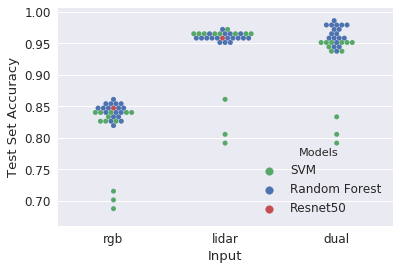

In [22]:
current_palette = sns.color_palette()
custom_pallete = {"SVM": current_palette[1], "Resnet50": current_palette[2], "Random Forest": current_palette[0]}

ax = sns.swarmplot(x="input", y="test_acc", hue="name", data=df, palette=custom_pallete);
ax.legend_.set_title("Models")
# ax._legend.set_bbox_to_anchor((.76, .35))
ax.set(xlabel='Input', ylabel='Test Set Accuracy', title='')
plt.savefig('results/test_data_set_classical.eps')


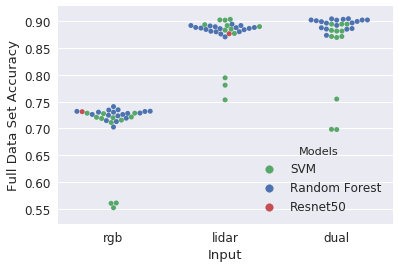

In [20]:
ax = sns.swarmplot(x="input", y="all_acc", hue="name", data=df, palette=custom_pallete);
ax.legend_.set_title("Models")
# ax._legend.set_bbox_to_anchor((.76, .35))
ax.set(xlabel='Input', ylabel='Full Data Set Accuracy', title='')
plt.savefig('results/all_data_set_classical.eps')

In [23]:
df = pd.read_csv('results/multi_train.csv')

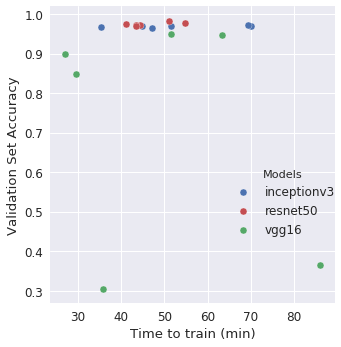

In [24]:
current_palette = sns.color_palette()
custom_pallete = {"inceptionv3": current_palette[0], "resnet50": current_palette[2], "vgg16": current_palette[1]}

df_lidar = df[df.input == 'lidar']
df_rgb = df[df.input == 'rgb']
ax = sns.pairplot(x_vars=['time'], y_vars=['val_acc'], data=df_lidar, hue="model", size=5, palette=custom_pallete)
#              plot_kws={"s": df['layer']})
ax._legend.set_title("Models")
ax._legend.set_bbox_to_anchor((.73, .4))
ax.set(xlabel='Time to train (min)', ylabel='Validation Set Accuracy', title='')
plt.savefig('results/cnn_lidar_results.eps')

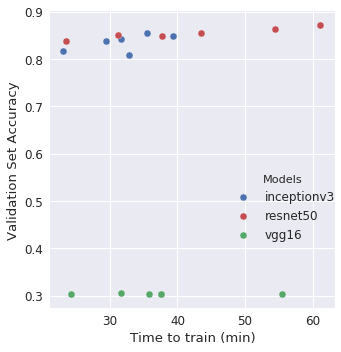

In [25]:
ax = sns.pairplot(x_vars=['time'], y_vars=['val_acc'], data=df_rgb, hue="model", size=5, palette=custom_pallete)
#              plot_kws={"s": df['layer']})
ax._legend.set_title("Models")
ax._legend.set_bbox_to_anchor((.73, .4))
ax.set(xlabel='Time to train (min)', ylabel='Validation Set Accuracy', title='')
plt.savefig('results/cnn_rgb_results.eps')

In [18]:
from sklearn.externals import joblib
all_classifiers = joblib.load('results/saved_classifiers.pkl')
classifiers = all_classifiers[65]
classifiers

{'all_acc': 0.90175530521351843,
 'classifier': RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='gini', max_depth=10, max_features='auto',
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 'input': 'dual',
 'name': 'Random Forest',
 'params': "{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50, 'class_weight': 'balanced'}",
 'test_acc': 0.98611111111111116,
 'train_acc': 1.0,
 'valid_acc': 0.98783454987834551}